# Register and Authorize

In [1]:
import pandas as pd
import numpy as np

# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

import spotipy
import spotipy.util as util
import spotipy.oauth2 as oauth2

%matplotlib inline

In [2]:
# MAKE SURE YOU HAVE THE FOLLOWING
client_id ='check your Spotify app in https://developer.spotify.com/dashboard/login'
client_secret = 'check your Spotify app in https://developer.spotify.com/dashboard/login'



In [3]:
token = oauth2.SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
cache_token = token.get_access_token()
sp = spotipy.Spotify(cache_token)

/Users/cristobalza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  


# Select the Music to Analyze

Let's choose one of my favorite Argentinian musicians: Daniela Spalla.

I will be using the Spotify's <u>This Is playlists</u>. For this section I will be using the [This Is Daniela Spalla](https://open.spotify.com/playlist/37i9dQZF1DZ06evO1GXZux)

The Spotify API has complex metrics that accomplish the goal of describing each track's features. The following metrics are:

| Key   |      Value Type      |  Value Description |
|----------|:-------------:|------:|
| duration_ms |  int | 	The duration of the track in milliseconds. |
| key|    int   |   	The estimated overall key of the track. Integers map to pitches using standard [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class).  E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
| mode| int |    	Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
|time_signature | int | 	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).|
|acousticness | float | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
|danceability| float | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| energy | float | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| instrumentalness | float | Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness | float | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| loudness | float | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. |
| speechiness | float | 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| valence | float | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| tempo | float | 	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| id | string | The Spotify ID for the track. |
| uri | string | The Spotify URI for the track. |
| track_href | string | A link to the Web API endpoint providing full details of the track. |
| analysis_url | string | 	An HTTP URL to access the full audio analysis of this track. An access token is required to access this data. |
| type | string | 	The object type: “audio_features” |

[Here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) is more information about the features of the Spotify's metrics

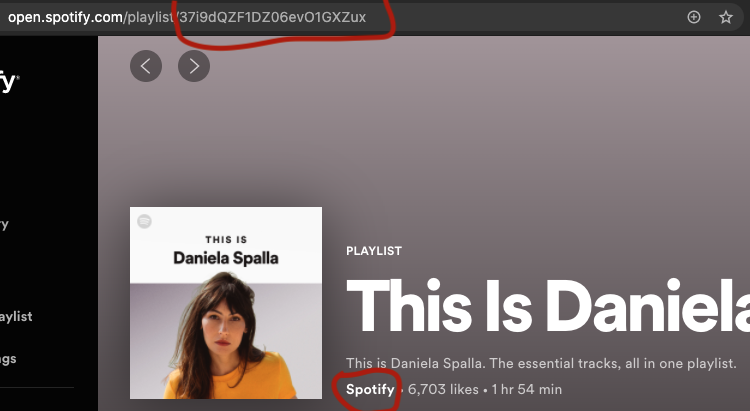

In [4]:
from IPython.display import Image
Image("./imgs/web_screenshot.png")

In [5]:
playlist_creator = "spotify"
playlist_id = "37i9dQZF1DZ06evO1GXZux"

In [6]:
def construct_playlist(creator, playlist_id):
    """ Method that construct a Playlist that is available online
    creator: Name of the username that uploaded the playlist of interest
    For example, the "This Is" Playlist are uploaded by Spotify so you can 
    playlist:"""
    
    # Create features of interest list
    playlist_features_list = ["artist", "album", "track_name", "track_id", 
                             "danceability", "energy", "key", "loudness", "mode", "speechiness",
                             "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature", 'acousticness']
    # Create an empty dataframe
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Create empty dict
    playlist_features = {}
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [7]:
this_is_daniela_spalla_playlist_df = construct_playlist(playlist_creator, playlist_id)

In [8]:
this_is_daniela_spalla_playlist_df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness
0,Esteman,Te Alejas Más De Mí,Te Alejas Más De Mí,5C2oCLLrtnYI8nNVOOruar,0.656,0.669,8,-7.124,1,0.0289,0,0.1650,0.859,179.912,219720,4,0.221
1,Daniela Spalla,Camas Separadas,Estábamos Tan Bien,3uRSGfI30pIW4efbKh4age,0.739,0.588,0,-6.696,1,0.0316,0,0.1930,0.848,123.914,221333,4,0.516
2,Daniela Spalla,Te Veo A La Salida,Te Veo A La Salida,380bdngjWglOA0VJ6XC7Ok,0.722,0.735,4,-5.463,1,0.0358,0,0.2150,0.657,133.021,227507,4,0.355
3,Daniela Spalla,Prometí,Prometí,6xfvTjnNlfYlwS68BKtY9c,0.638,0.671,10,-6.098,0,0.0241,0,0.2730,0.712,92.064,188629,4,0.108
4,Daniela Spalla,Bailando Lentos,Bailando Lentos,3wLoHa8a0G7oIYWq65GopE,0.686,0.432,0,-7.190,1,0.0315,5.55e-06,0.0845,0.495,132.898,207413,4,0.460


If we go to this same playlist in the Spotify App or the Web Spotify platform you will find the same songs than in this DataFrame.

***

## Weekly Discover

Now, will do a similar thing that we did with the "This Is Daniella Spalla" example.

This time we will save the weekly playlist. As the name of this playlist describe, in order to make this playlist bigger, I need to come back in a weekly basis to see to make this dataset larger.

In [9]:
playlist_creator = "spotify"
playlist_id = "37i9dQZEVXcXnJbgb2ItGx"
discover_weekly_cristobal =  construct_playlist(playlist_creator, playlist_id)
# Current's Week Playlist
discover_weekly_cristobal.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness
0,NakamuraEmi,NIPPONNO ONNAWO UTAU BEST2,ちっとも知らなかった,2nFlfyBgXxH2KT5W5tcxjh,0.634,0.828,6,-3.382,0,0.0414,0.000003,0.113,0.502,105.982,308800,4,0.1340
1,Freezzy,Liar mask,Liar mask,3jJU7OtjQLqk6a9zEsFKwl,0.463,0.854,2,-7.570,0,0.0623,0.000000,0.268,0.432,90.034,289065,4,0.1450
2,Frying-Pan,"TV Anime ""Ace of Diamond"" Original Soundtrack",Grow Stronger Day by Day - Theme of Sawamura -,1JdtDNjz2Uif96fgQyWTRP,0.368,0.715,9,-6.603,0,0.0339,0.865000,0.280,0.597,160.006,115560,4,0.0150
3,Mason Lieberman,You Say Run (UA Class of 2020 Edition),Might+u (UA Class of 2020 Edition),5hzwm8b8iNasCenOOzhrpb,0.223,0.316,7,-8.069,1,0.0320,0.000087,0.133,0.203,131.849,217917,3,0.9270
4,HIRAGANA KAMIYADO,HRGN,Kokoronotizu,4tfPNSXU3GtSnKC1AP9Twv,0.531,0.953,1,-3.225,1,0.0653,0.000000,0.319,0.505,131.992,264091,4,0.0414


*****

*****

****

In [10]:
# CHANGE NUMBER OF WEEK
discover_weekly_cristobal.to_csv('./output/weekly_discover_playlists/my_discover_weekly_week_Aug_30.csv')

In [12]:
temp = pd.read_csv('./output/weekly_discover_playlists/my_discover_weekly_week_Aug_30.csv')
temp.head()

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness
0,0,NakamuraEmi,NIPPONNO ONNAWO UTAU BEST2,ちっとも知らなかった,2nFlfyBgXxH2KT5W5tcxjh,0.634,0.828,6,-3.382,0,0.0414,0.000003,0.113,0.502,105.982,308800,4,0.1340
1,1,Freezzy,Liar mask,Liar mask,3jJU7OtjQLqk6a9zEsFKwl,0.463,0.854,2,-7.570,0,0.0623,0.000000,0.268,0.432,90.034,289065,4,0.1450
2,2,Frying-Pan,"TV Anime ""Ace of Diamond"" Original Soundtrack",Grow Stronger Day by Day - Theme of Sawamura -,1JdtDNjz2Uif96fgQyWTRP,0.368,0.715,9,-6.603,0,0.0339,0.865000,0.280,0.597,160.006,115560,4,0.0150
3,3,Mason Lieberman,You Say Run (UA Class of 2020 Edition),Might+u (UA Class of 2020 Edition),5hzwm8b8iNasCenOOzhrpb,0.223,0.316,7,-8.069,1,0.0320,0.000087,0.133,0.203,131.849,217917,3,0.9270
4,4,HIRAGANA KAMIYADO,HRGN,Kokoronotizu,4tfPNSXU3GtSnKC1AP9Twv,0.531,0.953,1,-3.225,1,0.0653,0.000000,0.319,0.505,131.992,264091,4,0.0414


In [13]:
discover_weekly_cristobal.columns

Index(['artist', 'album', 'track_name', 'track_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'acousticness'],
      dtype='object')

In [14]:
temp.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
temp.columns == discover_weekly_cristobal.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [16]:
(temp['track_name'] == discover_weekly_cristobal['track_name']).value_counts()

True    30
Name: track_name, dtype: int64

***

#### Week 3

In [17]:
weekly_discover_week_3_df = pd.read_csv('./output/weekly_discover_playlists/my_discover_weekly_week_3.csv')
weekly_discover_week_3_df.head()

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness
0,0,Porta,Libérate,Libérate,71Z6QA4Zezn76fkJNyizrV,0.755,0.808,7,-6.591,1,0.3790,0.00000,0.0816,0.525,92.262,182870,4,0.135000
1,1,Destripando la Historia,Hestia,Hestia,2W8cCrU5XzFGE8sl5SxtJu,0.858,0.574,6,-5.931,1,0.0632,0.00000,0.3010,0.938,121.998,212828,4,0.460000
2,2,Brian the Sun,Lonely Go! (Another Edition),Lonely Go!,4keISaGHMbtgwOaTCUBfzT,0.477,0.979,8,-1.650,1,0.0933,0.00000,0.3330,0.449,102.036,238507,4,0.000081
3,3,Say Ocean,Primer Lugar,Primer Lugar,0meCAzWjALDb070H6L9DsS,0.668,0.942,10,-1.859,0,0.1340,0.00000,0.0955,0.813,147.997,212939,4,0.044000
4,4,Alvei,Summertime Trap Ver.,Summertime Trap Ver.,79IMx3KnX1LDuKRcO7Uwfh,0.846,0.366,9,-8.304,1,0.1910,0.00257,0.0837,0.873,125.129,123115,4,0.028100


In [18]:
weekly_discover_week_3_df.shape

(30, 18)

#### Week 4

In [19]:
weekly_discover_week_4_df = pd.read_csv('./output/weekly_discover_playlists/my_discover_weekly_week_4.csv')
weekly_discover_week_4_df.head()

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness
0,0,Various Artists,Frozen 2 (Banda Sonora Original en Español/Edi...,Muéstrate,043l1DXTiAQYsixo3AUljB,0.372,0.318,6,-7.963,1,0.0303,0.000056,0.0958,0.136,123.233,260907,4,0.82200
1,1,Jaime Altozano,Roundstein,Roundstein,4GIT7n9gyvANOR8Zgqop7b,0.588,0.630,9,-6.767,0,0.0364,0.207000,0.3270,0.500,87.970,245568,4,0.39000
2,2,松澤由美,Yumi Matsuzawa AnimeSong Cover Album,Chikyuugi,0CpzV7FSXdGwE5Y3I6vrU6,0.547,0.540,7,-7.990,0,0.0280,0.000000,0.3220,0.491,102.976,252745,4,0.40100
3,3,Los Malditos Subercaseaux,No Me Digas Que No,No Me Digas Que No,5kdPytSu6DZcG0pcLXrsQv,0.545,0.901,11,-5.874,0,0.0576,0.000005,0.1870,0.818,152.872,194656,4,0.00625
4,4,Various Artists,熱烈!アニソン魂 THE BEST カバー楽曲集 TVアニメシリーズ「るろうに剣心 -明治剣...,1/2 (第39話〜82話 OP),0njqPPFUv1RHBjp2npEfLo,0.756,0.634,9,-7.356,1,0.0302,0.000028,0.1440,0.397,122.885,308293,4,0.59100


In [20]:
weekly_discover_week_4_df.shape

(30, 18)

#### Week 5

In [21]:
weekly_discover_week_5_df = pd.read_csv('./output/weekly_discover_playlists/my_discover_weekly_week_5.csv')
weekly_discover_week_5_df.head()

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness
0,0,RC Succession,COMPLETE EPLP ~ALL TIME SINGLE COLLECTION~,イエスタデイをうたって,2gup5lzj159IOK5dslfizo,0.523,0.519,2,-8.574,0,0.0301,0.000000,0.1830,0.745,136.891,172707,4,0.293000
1,1,(K)NoW_NAME,TVアニメ『Fairy gone フェアリーゴーン』OP&ED THEME SONG「KNO...,Ash-like Snow,0ORcxmgIVTRXx8GM4WM9Gr,0.359,0.892,2,-4.471,1,0.0460,0.000130,0.0720,0.519,189.968,253253,3,0.000109
2,2,Kenichiro Suehiro,OVA「Re:ゼロから始める異世界生活 Memory Snow」Memory Album,Relive,0jChVCmWd2idwnPlFRBsW0,0.507,0.889,9,-3.141,0,0.0490,0.000003,0.0593,0.592,97.859,241320,4,0.015000
3,3,茅原実里,SPIRAL,みちしるべ,3dRVzK0PsqrT2WUuAGvitu,0.270,0.402,9,-6.197,1,0.0339,0.000000,0.0871,0.224,173.350,286427,4,0.165000
4,4,TOTALFAT,Grown Kids,Place to Try - Live at 新木場STUDIO COAST「FAST AN...,5JBI6sulnELvh0e2FPmWey,0.380,0.950,6,-4.258,1,0.1270,0.000037,0.3280,0.283,114.190,350173,4,0.018300


In [22]:
weekly_discover_week_5_df.shape

(30, 18)

#### Week 6

In [23]:
weekly_discover_week_6_df = pd.read_csv('./output/weekly_discover_playlists/my_discover_weekly_week_6.csv')
weekly_discover_week_6_df.head()

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness
0,0,DLD,Transcender,A PARTIR DE MAÑANA,4xzH7xYOpi2EX7FmVircKO,0.489,0.834,9,-5.402,1,0.0529,0.000010,0.3600,0.796,167.812,251547,4,0.01180
1,1,Wantaways,The Turning Point,The Turning Point,6Or84r7sBRNO4WBep52I4k,0.610,0.704,11,-5.696,0,0.0285,0.001520,0.0919,0.603,104.893,154823,4,0.01740
2,2,Adrian Barba,"Peace Sign (From ""Boku no Hero Academia)","Peace Sign (From ""Boku no Hero Academia)",4eqaV8KM0wNV0z7sxDDxQt,0.612,0.908,10,-5.138,0,0.0742,0.000000,0.3430,0.696,100.030,236866,4,0.02340
3,3,Sou,ミスターフィクサー,ミスターフィクサー,3Sa8nfES4XtU6K83YWm5G6,0.619,0.947,0,-4.021,1,0.1690,0.000000,0.1310,0.672,144.992,219813,4,0.16000
4,4,Solence,Phoenix,Phoenix,3WbiB6D07BsPJeCu1IPUoR,0.403,0.878,6,-5.823,1,0.1590,0.000019,0.1350,0.333,175.989,167823,4,0.00436


### Week 7

In [24]:
weekly_discover_week_7_df = pd.read_csv('./output/weekly_discover_playlists/my_discover_weekly_week_Aug_23.csv')
weekly_discover_week_7_df.head()

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness
0,0,Lasso,El Exilio Voluntario De Una Mente Saturada,De Tú A Tú,2DsBBIZsZDgE31cbveZy6J,0.443,0.802,0,-5.922,0,0.1490,0.000000,0.1940,0.665,88.495,195907,4,0.42700
1,1,MEMAI SIREN,image_____ (Anime Version),image_____ - Anime Version,4VDTYGgJ32nvLXpyO8m2Lq,0.492,0.933,9,-3.657,1,0.0544,0.000653,0.1970,0.236,100.563,89173,4,0.00154
2,2,"Kami-sama, I have noticed",名前のない青,名前のない青,0xSKobz5d2E8oIkwTumwkZ,0.531,0.917,8,-5.391,1,0.0679,0.000000,0.3400,0.631,99.010,206059,4,0.03010
3,3,Vete a la Versh,Balance Universal,Tiempo,7GwuppDoOWsMqobSN9e3pY,0.473,0.399,7,-5.793,1,0.0423,0.000000,0.0873,0.571,199.739,206667,4,0.35000
4,4,May'n,ViViD,ViViD,70oPbPhYSIxThsQFRHMYJB,0.534,0.977,1,-1.549,0,0.1620,0.000000,0.2860,0.364,102.497,262284,4,0.13000


### Week 8

In [26]:
weekly_discover_week_8_df = pd.read_csv('./output/weekly_discover_playlists/my_discover_weekly_week_Aug_30.csv')
weekly_discover_week_8_df.head()

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness
0,0,NakamuraEmi,NIPPONNO ONNAWO UTAU BEST2,ちっとも知らなかった,2nFlfyBgXxH2KT5W5tcxjh,0.634,0.828,6,-3.382,0,0.0414,0.000003,0.113,0.502,105.982,308800,4,0.1340
1,1,Freezzy,Liar mask,Liar mask,3jJU7OtjQLqk6a9zEsFKwl,0.463,0.854,2,-7.570,0,0.0623,0.000000,0.268,0.432,90.034,289065,4,0.1450
2,2,Frying-Pan,"TV Anime ""Ace of Diamond"" Original Soundtrack",Grow Stronger Day by Day - Theme of Sawamura -,1JdtDNjz2Uif96fgQyWTRP,0.368,0.715,9,-6.603,0,0.0339,0.865000,0.280,0.597,160.006,115560,4,0.0150
3,3,Mason Lieberman,You Say Run (UA Class of 2020 Edition),Might+u (UA Class of 2020 Edition),5hzwm8b8iNasCenOOzhrpb,0.223,0.316,7,-8.069,1,0.0320,0.000087,0.133,0.203,131.849,217917,3,0.9270
4,4,HIRAGANA KAMIYADO,HRGN,Kokoronotizu,4tfPNSXU3GtSnKC1AP9Twv,0.531,0.953,1,-3.225,1,0.0653,0.000000,0.319,0.505,131.992,264091,4,0.0414


***

### Put them together and Save file

We will concatenate the weekly playlist into one final dataset. For this, we will use `np.concat` for stiching together the different "Weekly Playlists". 

Then, we will save it into a `.csv` file.

In [27]:
frames = [
    weekly_discover_week_3_df,
    weekly_discover_week_4_df,
    weekly_discover_week_5_df,
    weekly_discover_week_6_df,
    weekly_discover_week_7_df,
    weekly_discover_week_8_df
]
weekly_discover_final_df = pd.concat(frames)
weekly_discover_final_df.shape

(180, 18)

In [28]:
weekly_discover_final_df.drop(columns = ['Unnamed: 0', 'track_id'], inplace = True)
weekly_discover_final_df.rename(columns={"track_name": "song_name"}, inplace=True)
weekly_discover_final_df.shape

(180, 16)

In [29]:
weekly_discover_final_df.to_csv('./output/project_data/weekly_discover_final.csv')